<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/Kmeans_Customer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

data = pd.read_excel('/content/CustomerDataSet.xlsx')
data

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


ID가 4인 사람이 1365품목을 45번 사고 10번 환불, 우편번호2인 지역에서

[[0.62101313 0.46153846]]
[[0.04065041 0.42424242]
 [0.79512195 0.47272727]]
[[0.83333333 0.20454545]
 [0.04065041 0.42424242]
 [0.73780488 0.875     ]]
[[0.90243902 0.03030303]
 [0.04065041 0.42424242]
 [0.73780488 0.875     ]
 [0.76422764 0.37878788]]
[[0.90243902 0.03030303]
 [0.6097561  0.77272727]
 [0.04065041 0.42424242]
 [0.76422764 0.37878788]
 [0.7804878  0.90909091]]
[[0.70731707 0.34090909]
 [0.04065041 0.42424242]
 [0.7804878  0.90909091]
 [0.90243902 0.03030303]
 [0.87804878 0.45454545]
 [0.6097561  0.77272727]]


<Figure size 720x432 with 0 Axes>

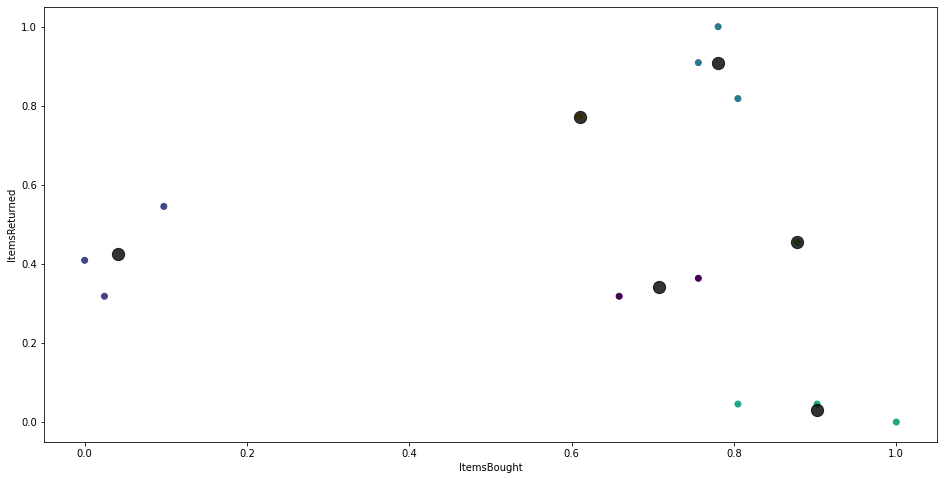

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

data = pd.read_excel('/content/CustomerDataSet.xlsx')
data

processed_data = data.copy()

#데이터 전처리 - 정규화를 위한 작업
scaler = MinMaxScaler()

scaler.fit(processed_data[['ItemsBought','ItemsReturned']])
processed_data[['ItemsBought','ItemsReturned']] = scaler.transform(processed_data[['ItemsBought','ItemsReturned']])

#화면 figure 생성
plt.figure(figsize=(10,6))

for i in range(1,7):
  model = KMeans(n_clusters=i)
  model.fit(processed_data[['ItemsBought','ItemsReturned']])
  model_predict = model.predict(processed_data[['ItemsBought','ItemsReturned']])
  centroids = model.cluster_centers_
  print(model.cluster_centers_)
plt.figure(figsize=(16,8))
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
#클러스터링 그리기
plt.scatter(processed_data['ItemsBought'],processed_data['ItemsReturned'],c=model_predict)
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=150,alpha=0.8)
plt.show()

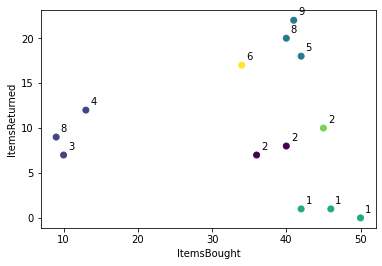

In [11]:
#플로팅하기
plt.scatter(data['ItemsBought'],data['ItemsReturned'],c=model_predict)

#우편번호로 범례달기
for(index, c_id, bought, returned, zip_code, product) in data.itertuples():
  plt.annotate(zip_code,(bought+0.6,returned+0.6))

plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()

[[0.04065041 0.42424242]
 [0.83333333 0.20454545]
 [0.73780488 0.875     ]]


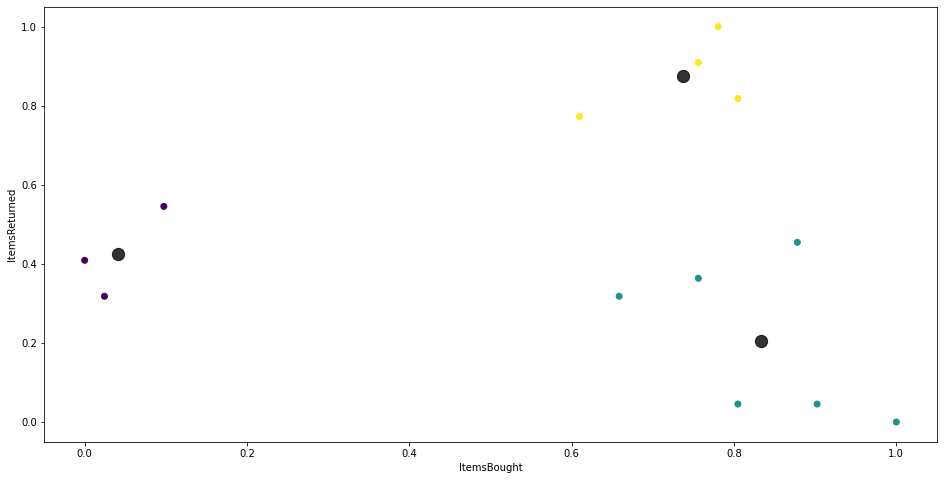

In [12]:
%matplotlib inline

model=KMeans(n_clusters=3)
model.fit(processed_data[['ItemsBought','ItemsReturned']])
model_predict = model.predict(processed_data[['ItemsBought','ItemsReturned']])
centroids = model.cluster_centers_
print(model.cluster_centers_)
plt.figure(figsize=(16,8))
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
#클러스터링 그리기
plt.scatter(processed_data['ItemsBought'],processed_data['ItemsReturned'],c=model_predict)
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=150,alpha=0.8)
plt.show()

In [13]:
#클러스터 0로 분류된 데이터를 추출해보자
data[model_predict==0]

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
3,8,13,12,4,2435
4,9,10,7,3,2435
8,14,9,9,8,2435


In [14]:
#클러스터 1로 분류된 데이터 추출
data[model_predict==1]

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
2,6,50,0,1,1343
7,12,40,8,2,1236
9,15,36,7,2,1764
10,16,42,1,1,1547
11,17,46,1,1,1265


In [15]:
#클러스터 2로 분류된 데이터 추출
data[model_predict==2]

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
1,5,42,18,5,2764
5,10,34,17,6,2896
6,11,40,20,8,2869
12,21,41,22,9,2465


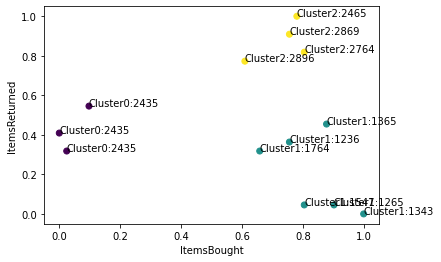

In [18]:
#create a scatter plot
plt.scatter(processed_data['ItemsBought'],processed_data['ItemsReturned'],c=model_predict)

#각 클러스터와 Product ID의 관계를 시각화
for index,c_id,bought,returned,zip_code,product in processed_data.itertuples():
  plt.annotate("Cluster{}:{}".format(model_predict[index],product),(bought,returned))

plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

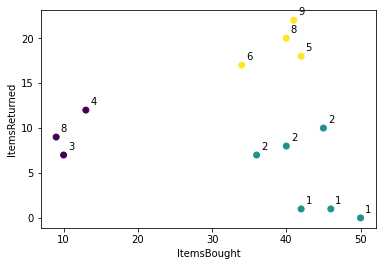

In [19]:
#create a scatter plot
plt.scatter(data['ItemsBought'],data['ItemsReturned'],c=model_predict)

#각 클러스터와 지역과의 관계 시각화
for (index,c_id,bought,returned,zip_code,product) in data.itertuples():
  plt.annotate(zip_code,(bought+0.6,returned+0.6))

plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()